In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
%matplotlib inline

In [50]:
x_load = np.load('C:\Users\Namrata\Desktop\ITU\Fall_2018\Capstone\sign-language-digits-dataset\X.npy')
y_load = np.load('C:\Users\Namrata\Desktop\ITU\Fall_2018\Capstone\sign-language-digits-dataset\Y.npy')
img_size = 64

#x_load.min()
#y_load.min()

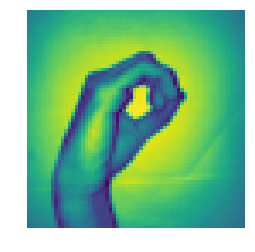

In [24]:
test_img = x_load[image_index_list[0]] 

plt.imshow(test_img.reshape(64, 64))
plt.axis('off')
plt.show()

In [165]:
def distort_images(image_data, image_index_list, distortion_type=None):
    
    image_set = image_data.copy()
    
    for idx in range(len(image_index_list)):
        
        ii = image_index_list[idx]
        print (ii, idx)
        
        if distortion_type == None:
            return image_set
        
        elif distortion_type == 'high':
            test_img = image_set[ii] 
            test_img[test_img < 0.5] = 0.0
            image_set[ii] = test_img
            
        elif distortion_type == 'low':
            test_img = image_set[ii]
            test_img[test_img > 0.75] = 1.0
            image_set[ii] = test_img            
    
    return image_set
        

In [166]:
dist_x_load = distort_images(x_load, [0,1,2,3,4,5,6,8,9], 'high')

(0, 0)
(1, 1)
(2, 2)
(3, 3)
(4, 4)
(5, 5)
(6, 6)
(8, 7)
(9, 8)


In [98]:
dist_x_load.shape

(2062L, 64L, 64L)

In [40]:
test_img_1 = test_img.copy()

In [41]:
test_img_1[test_img_1<0.5] = 0.0

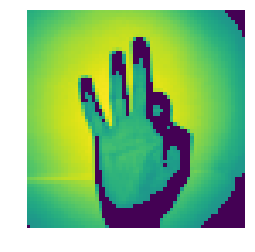

In [167]:
plt.imshow(dist_x_load[1].reshape(64, 64))
plt.axis('off')
plt.show()

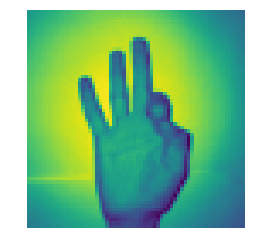

In [79]:
plt.imshow(x_load[1].reshape(64, 64))
plt.axis('off')
plt.show()

In [83]:
x_load.shape

(2062L, 64L, 64L)

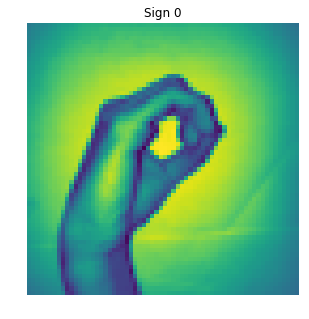

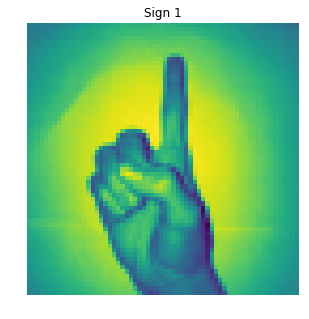

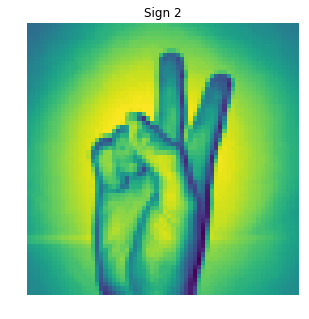

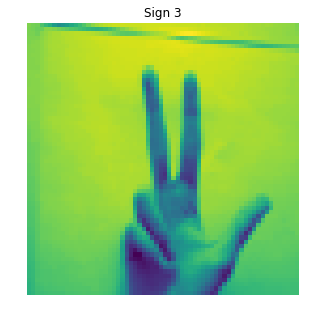

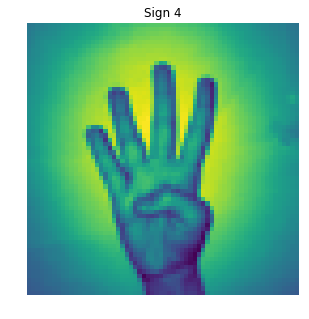

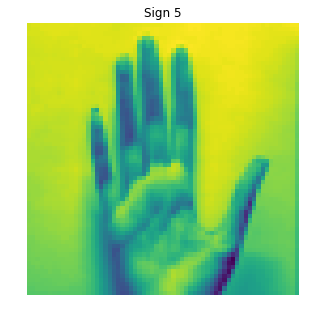

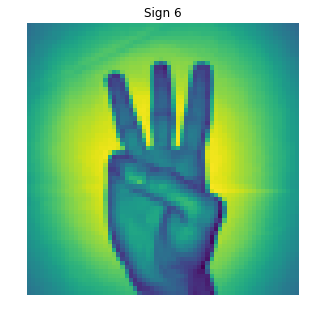

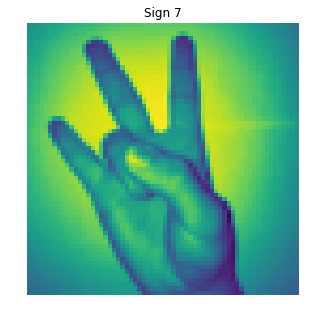

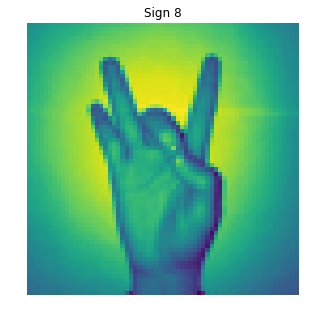

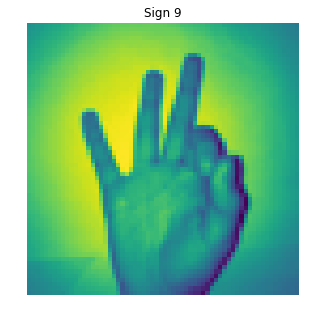

In [4]:
# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [168]:
X_old = x_load.reshape(x_load.shape[0], x_load.shape[1]*x_load.shape[2]).copy()

In [169]:
dist_X_old = dist_x_load.reshape(dist_x_load.shape[0], dist_x_load.shape[1]*dist_x_load.shape[2]).copy()

In [170]:
n_components = 4

X = X_old[0:9,:]
(n_samples, n_features) = X.shape
estimator = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
pca_L2 = components_[:n_components]



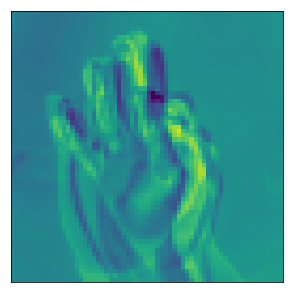

In [171]:
plt.figure(figsize=(6, 5))
for i, comp in enumerate(pca_L2):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

In [172]:
n_components = 4
X_dist = dist_X_old[0:9,:]
#(n_samples, n_features) = X.shape
estimator = PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X_dist)
components_ = estimator.components_
pca_L2_dist = components_[:n_components]

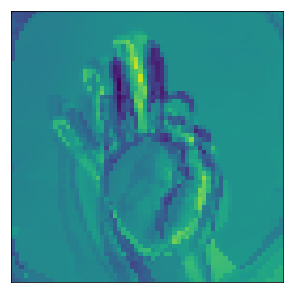

In [173]:
plt.figure(figsize=(6, 5))
for i, comp in enumerate(pca_L2_dist):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

In [174]:
pca_projected_L2 = np.dot(np.dot(X_old[0:20],pca_L2.T), components_)
pca_projected_L2_dist = np.dot(np.dot(dist_X_old[0:20],pca_L2_dist.T), components_)

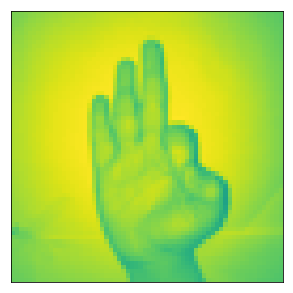

In [175]:
plt.figure(figsize=(6, 5))

for ii in range(4,5):
    comp = X_old[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64,64 )),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

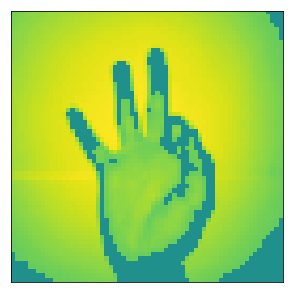

In [186]:
plt.figure(figsize=(6, 5))

for ii in range(3,4):
    comp = dist_X_old[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

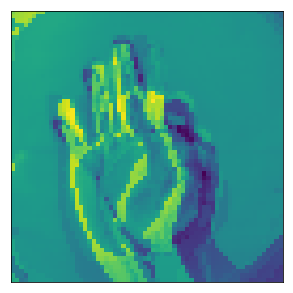

In [187]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):
for ii in range(3,4):
    comp = pca_projected_L2[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

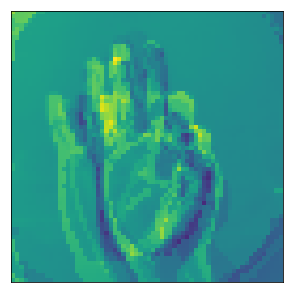

In [188]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):
for ii in range(3,4):
    comp = pca_projected_L2_dist[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

In [ ]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):

for ii in range(3,4):
    
    comp = pca_projected[ii,:]
    
    vmax = max(comp.max(), -comp.min())
    
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    
    plt.xticks(())
    
    plt.yticks(())
    
#plt.savefig('graph.png')

plt.show()

In [ ]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):
for ii in range(3,4):
    comp = pca_projected_L1[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

In [ ]:
image_index_list = [260,900]
for each in range(1):
    plt.figure(figsize=(8,5))
    plt.imshow(x_load[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [ ]:
X.shape

In [ ]:
R.shape

In [ ]:
pca_projected_L1 = np.dot(np.dot(X, R), R.T)

In [ ]:
pca_projected.shape

In [ ]:
X.shape

In [136]:
import numpy.linalg as LA

In [ ]:
components_.shape

In [137]:
def to_binary(x):
    return np.where(x > 0.0, 1, -1)

In [138]:
def single_sub_optimal(b, X, num_iter):
    counter = 0

    while counter <= num_iter:
        b = to_binary(np.dot(np.dot(X.T, X), b))
        counter = counter + 1
        #print (counter, num_iter)
    
    print ('# of iterations: ', num_iter)
    
    return b

In [155]:
def multiple_sub_optimal(X_org, K):
    
    R = np.zeros((X_org.shape[0], K))
    X = X_org.copy()
    
    for k in range(K):
        # Different initialization per componenet
        b = np.random.randn(X.shape[1],1)
        b_ini = to_binary(b)
        # Find sub-optimal b
        b = single_sub_optimal(b_ini, X, 50)
        #Find sub-optimal single L1-PCA
        r_not_normal = np.dot(X, b)
        r_normal = r_not_normal/LA.norm(r_not_normal)
        # Store the vector
        R[:, [k]] = r_normal
        # Update X
        
        X = X - np.dot(np.dot(r_normal, r_normal.T),X)
    
    return R

In [ ]:
X.shape

In [179]:
R_old = multiple_sub_optimal(X.T,6)

('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)


In [180]:
R_old.shape

(4096L, 6L)

In [181]:
R_dist = multiple_sub_optimal(X_dist.T,6)

('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)
('# of iterations: ', 50)


In [182]:
pca_projected_L1 = np.dot(np.dot(X_old[0:20], R_old), R_old.T)
pca_projected_L1_dist = np.dot(np.dot(dist_X_old[0:20], R_dist), R_dist.T)

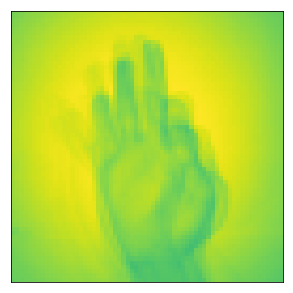

In [183]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):
for ii in range(14,15):
    comp = pca_projected_L1[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

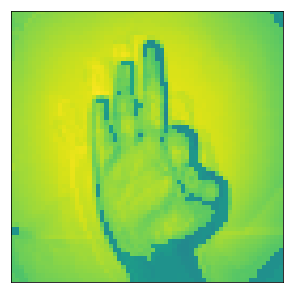

In [185]:
plt.figure(figsize=(6, 5))

#for i, comp in enumerate(X):
for ii in range(4,5):
    comp = pca_projected_L1_dist[ii,:]
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
#plt.savefig('graph.png')
plt.show()

In [ ]:
b_ini = np.random.randn(X.shape[1],1)

In [ ]:
b = single_sub_optimal(b_ini, X, 3)

In [ ]:
n_components = 10
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()

In [ ]:
#def RandomNoise(x_noisy):
#x_noisy = x_load + 3 * x_load.std() * np.random.random(x_load.shape)
x_noisy = x_load + 0.1  * np.random.random(x_load.shape)


In [ ]:
# one sample from each digits
image_index_list = [260,900,1800,1600,1400,2061,700,500,1111,100]
for each in range(10):
    plt.figure(figsize=(8,5))
    plt.imshow(x_noisy[image_index_list[each]].reshape(img_size, img_size))
    plt.axis('off')
    title = "Sign " + str(each) 
    plt.title(title)
plt.show()

In [ ]:
X = x_noisy.reshape((len(x_noisy), -1)) 
train = X
test = X[image_index_list]
n_pixels = X.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
X_test = test[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
y_test = test[:, n_pixels // 2:]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
n_components = 5
(n_samples, n_features) = X.shape
estimator = decomposition.PCA(n_components=n_components, svd_solver='randomized', whiten=True)
estimator.fit(X)
components_ = estimator.components_
images = components_[:n_components]
plt.figure(figsize=(6, 5))
for i, comp in enumerate(images):
    vmax = max(comp.max(), -comp.min())
    plt.imshow(comp.reshape((64, 64)),interpolation='nearest',vmin=-vmax, vmax=vmax)
    plt.xticks(())
    plt.yticks(())
plt.savefig('graph.png')
plt.show()